# Introduction

In this lab, we will perform outlier detection on a real dataset using scikit-learn. Outlier detection is the process of identifying data points that significantly differ from the majority of the data. Outliers can be caused by measurement errors, data corruption, or simply represent a rare event. Outlier detection is important in many applications, such as fraud detection, network intrusion detection, and medical diagnosis.

# Import libraries and load dataset

We will begin by importing the necessary libraries and loading the Wine dataset from scikit-learn. The Wine dataset contains information about different types of wine, including their chemical properties.

In [1]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load dataset
X1 = load_wine()["data"][:, [1, 2]]  # two clusters
X2 = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

# Define classifiers and colors

We will define the outlier detection classifiers that we will use in this lab. We will also define the colors that will be used to plot the results.

In [2]:
# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]

# Outlier detection on two-dimensional data

We will perform outlier detection on the two-dimensional Wine dataset. We will use three different classifiers to detect outliers: Empirical Covariance, Robust Covariance, and One-Class SVM. We will then plot the results.

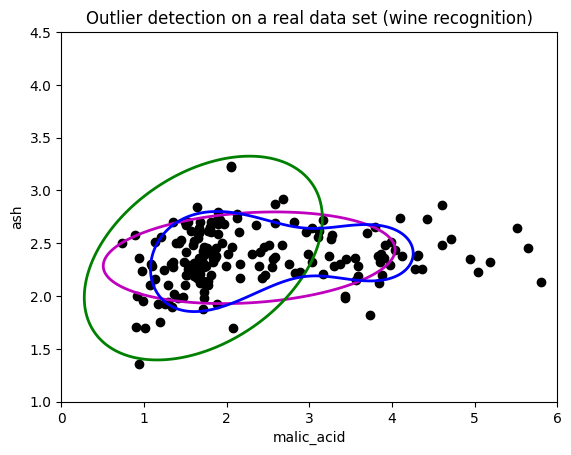

In [3]:
# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.ylabel("ash")
plt.xlabel("malic_acid")
plt.show()

# Outlier detection on complex data

We will perform outlier detection on the "banana"-shaped Wine dataset. We will use the same three classifiers as before and plot the results.

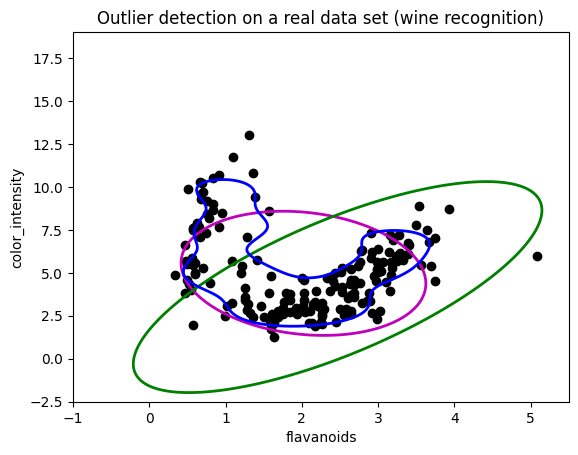

In [4]:
# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

# Plot the results (= shape of the data points cloud)
plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color="black")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")
plt.show()

# Summary

In this lab, we performed outlier detection on two-dimensional Wine datasets using scikit-learn. We used three different classifiers to detect outliers: Empirical Covariance, Robust Covariance, and One-Class SVM. We then plotted the results to visualize the data and the detected outliers. Outlier detection is an important task in data analysis, and scikit-learn provides several tools to perform this task efficiently.